<a href="https://colab.research.google.com/github/abdullahyasser0/Medical-health-classifier-ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [ ]:
!pip install --quiet kaggle
!pip3 install --quiet neptune-client==1.2.0
!pip install --quiet opendatasets

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from sklearn import linear_model
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.svm import SVC
import opendatasets as od
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import json

#functions

In [ ]:
def Model_Evaluation(y_test,y_predicted):
    confusionMatrix = confusion_matrix(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='macro')
    recall = recall_score(y_test, y_predicted, average='macro')
    f1_score_val = f1_score(y_test, y_predicted, average='macro')

    # print("Confusion Matrix:")
    # print(confusionMatrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score_val)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")

In [ ]:
def resample_data(data, num_observations):
    resampled_data = pd.DataFrame()
    for i in range(0, 13):
        data_activity_i = data[data['Activity'] == i]
        data_activity_i = data_activity_i.sample(n=num_observations, random_state=1)
        resampled_data = pd.concat([data_activity_i, resampled_data])
    return resampled_data

#import dataSet

In [ ]:
with open('kaggle.json', 'w') as f:
        json.dump({"username":"kaggle username ","key":"kaggle key"}, f) # get your from your kaggle api

In [ ]:
od.download('https://www.kaggle.com/datasets/gaurav2022/mobile-health/data')

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health


100%|██████████| 35.5M/35.5M [00:00<00:00, 170MB/s] 


In [ ]:
df=pd.read_csv('/content/mobile-health/mhealth_raw_data.csv')

#Data Exploration

In [ ]:
df.head(3)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [ ]:
df['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

<Axes: xlabel='Activity'>

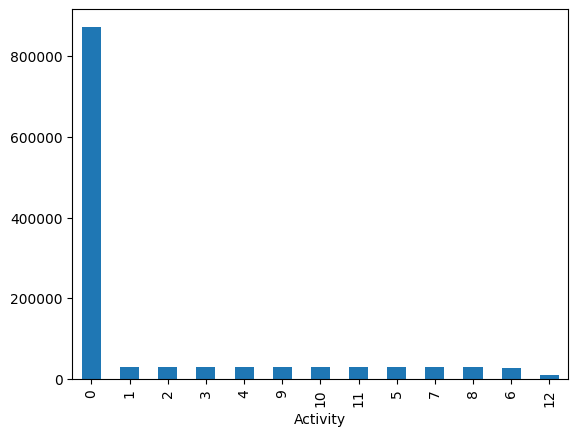

In [ ]:
df['Activity'].value_counts().plot.bar()

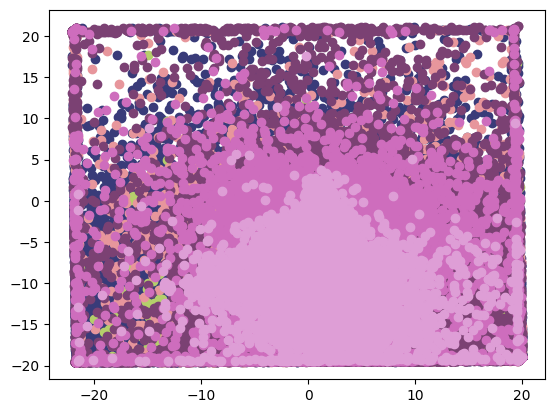

In [ ]:
unique_classes = df['Activity'].unique()
num_colors = len(unique_classes)
colors = plt.cm.tab20b(np.linspace(0, 1, num_colors))

for class_name, color in zip(unique_classes, colors):
    plt.scatter(df[df['Activity'] == class_name]['alx'], df[df['Activity'] == class_name]['aly'], label=class_name, color=color)

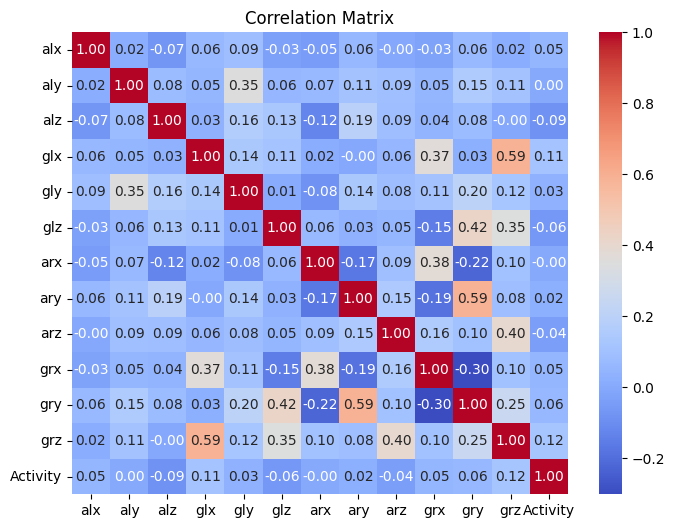

In [ ]:
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Data resampling

In [ ]:
pre_data = resample_data(df, 2000)


In [ ]:
pre_data['Activity'].value_counts()

Activity
12    2000
11    2000
10    2000
9     2000
8     2000
7     2000
6     2000
5     2000
4     2000
3     2000
2     2000
1     2000
0     2000
Name: count, dtype: int64

In [ ]:
df_target = pre_data["Activity"]
df_resampled = pre_data.drop(columns=["Activity","subject"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_resampled, df_target, test_size=0.25, random_state=42)

#SVM

In [ ]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 5]

In [ ]:
for c,g in zip(C_values,gamma_values):
  svm = SVC(C=c, kernel='rbf', gamma =g )
  svm.fit(x_train, y_train)
  svm_y_pred = svm.predict(x_test)
  print(f"with c_val {c} and gama {g} : ",accuracy_score(y_test, svm_y_pred)*100, "%")
  Model_Evaluation(y_test,svm_y_pred)

with c_val 0.1 and gama 0.01 :  72.33846153846154 %
Confusion Matrix:
[[ 18  68  40  10  43  12  61  54  69  49  35  26  39]
 [  0 297   0   0  78   0 105   0   0   0   0   0   0]
 [ 53   0 219   0   0  47   0  87   0  48   0  60   0]
 [  0   0   0 490   0   0   0   0   0   0   0   0   0]
 [  2  49   0   0 270  34  36   0  67   1   0  13  12]
 [ 32  52   8   3  89 138  47  14  62  12   5   7  38]
 [ 14  88   0   0  15   0 307   5  64   0   0   0   3]
 [  9  47  41  14  22   0  43 275   1  43   0   7   3]
 [ 12  31   0   0  22  49 104   0 255   3   1   1  37]
 [  1   0   1   0   2   1   0   9  24 462   0   0   1]
 [  0   0  29   1   1   6   2   7   8   3 267  92  71]
 [  5   0  55   3   6  26  10  23   8   5  48 315  31]
 [  3   9  19   0  31   9  27  20  14   6  96  84 144]]
Accuracy: 0.5318461538461539
Precision: 0.5068960777700076
Recall: 0.533749779946961
F1 Score: 0.5124339169464507
with c_val 1 and gama 0.1 :  82.78461538461539 %
Confusion Matrix:
[[ 18  68  40  10  43  12  61  54

In [ ]:
svm = SVC(C = 1, kernel='rbf', gamma = 0.1 )
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
print(f"with c_val {1} and gama {0.1} : ",accuracy_score(y_test, svm_y_pred)*100, "%")


with c_val 1 and gama 0.1 :  82.78461538461539 %


Accuracy: 0.8278461538461539
Precision: 0.8296711877248133
Recall: 0.8292849159627443
F1 Score: 0.8222927823566106


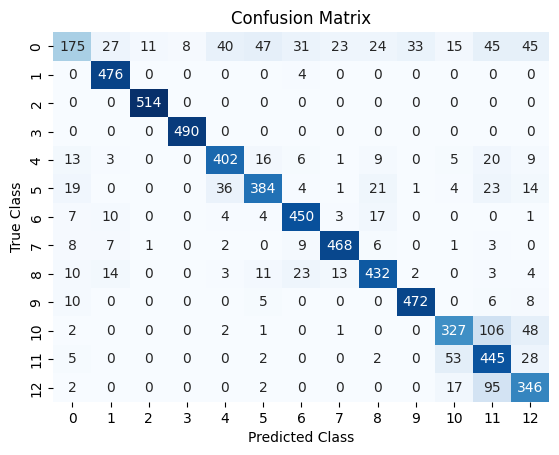

In [ ]:
Model_Evaluation(y_test,svm_y_pred)

In [ ]:
score_SVM = cross_val_score(svm, x_train, y_train, cv=5).mean()

In [ ]:
score_SVM

0.8191794871794873

#KNN

In [ ]:
k_values=[3,5,7]

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, knn_y_pred)
    print(f"with k = {k} : ",accuracy_score(y_test, knn_y_pred)*100, "%")
    Model_Evaluation(y_test,knn_y_pred)

with k = 3 :  82.27692307692308 %
Confusion Matrix:
[[210  15  14   7  57  45  38  35  19  43   8  10  23]
 [  0 480   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 514   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 490   0   0   0   0   0   0   0   0   0]
 [ 25   2   0   0 421  17  10   2   3   0   2   0   2]
 [ 39   0   1   0  70 348   6   3  37   2   1   0   0]
 [  9   5   1   0   6   1 452  10  12   0   0   0   0]
 [ 12   1   1   0   1   0   8 476   6   0   0   0   0]
 [ 16   6   0   0   8  17  17  19 429   2   0   1   0]
 [ 12   0   1   0   3   6   0   8   2 467   0   0   2]
 [ 25   0   0   0  17   5   2   3   1   0 377  39  18]
 [ 27   0   0   0   7   8   1   0   5   1 110 354  22]
 [ 24   0   1   0   6   7   2   1   1   4  55  31 330]]
Accuracy: 0.8227692307692308
Precision: 0.8192267124098582
Recall: 0.8250841451301493
F1 Score: 0.8191284842550279
with k = 5 :  82.15384615384616 %
Confusion Matrix:
[[185  18  15   8  61  40  44  35  22  45  14   8  29]
 [  0 480 

with k = 5 :  82.15384615384616 %
Accuracy: 0.8215384615384616
Precision: 0.8169355855232848
Recall: 0.8240957649443317
F1 Score: 0.8151290580988528


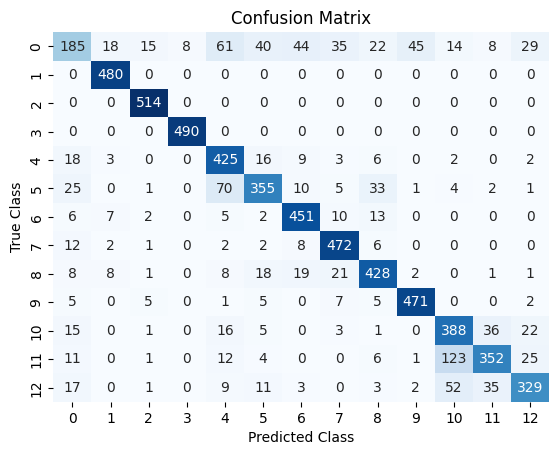

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"with k = {5} : ",accuracy_score(y_test, knn_y_pred)*100, "%")
Model_Evaluation(y_test,knn_y_pred)

In [ ]:
score_KNN = cross_val_score(knn, x_train, y_train, cv=5).mean()
score_KNN

0.8145641025641026

#NN

In [ ]:
def visualize_performance(n_epochs, acc, val_acc, loss, val_loss):
  %matplotlib inline
  epochs = np.arange(n_epochs)
  acc = np.array(acc)
  val_acc = np.array(val_acc)
  loss = np.array(loss)
  val_loss = np.array(val_loss)
  plt.plot(epochs, acc*100, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc*100, 'b', label='Validation accuracy')
  plt.scatter(epochs[val_acc.argmax()], val_acc.max()*100, color='green', s=70)
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[12]),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=13, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)
model.summary()
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 13)                845       
                                                                 
Total params: 3373 (13.18 KB)
Trainable params: 3373 (13.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
610/610 [==============================] - 4s 4ms/step - loss: 1.4855 - accuracy: 0.5273 - val_loss: 1.1482 - val_accuracy: 0.6446
Epoch 2/100
610/610 [==============================] - 2s 3ms/step - loss: 1.0194 - accuracy: 0.6718 - val_loss: 0.9435 - val_accuracy: 0.697

In [ ]:
nn_y_predict=model.predict(x_test)

204/204 [==============================] - 0s 1ms/step


In [ ]:
nn_pred=[np.argmax(point) for point in nn_y_predict]

Accuracy: 0.874
Precision: 0.8719198273920117
Recall: 0.8752345676177141
F1 Score: 0.8729637637180178


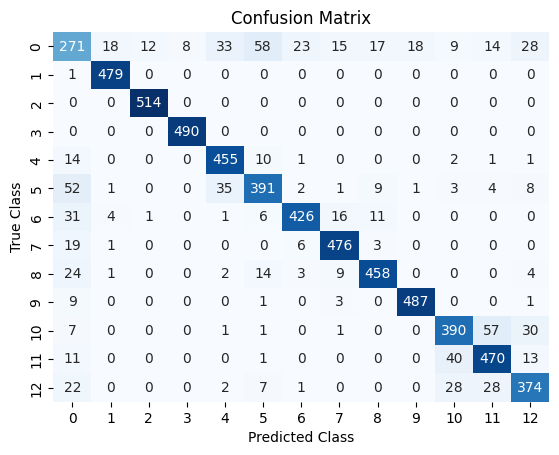

In [ ]:
Model_Evaluation(y_test,nn_pred)

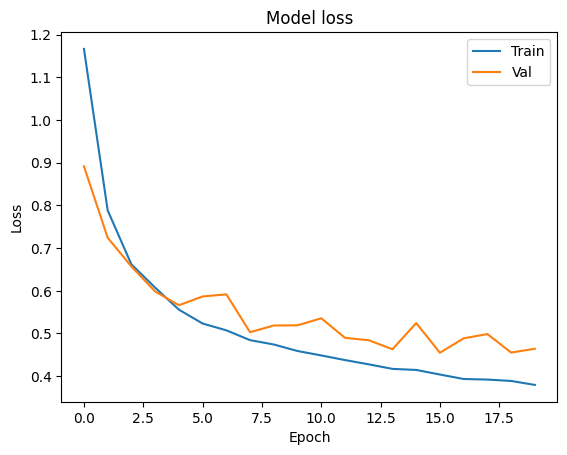

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#Logestic regretion

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_y_pred = LR.predict(x_test)
LR.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5483076923076923

Accuracy: 0.5483076923076923
Precision: 0.5250291549570808
Recall: 0.5495244315119469
F1 Score: 0.5297742776728156


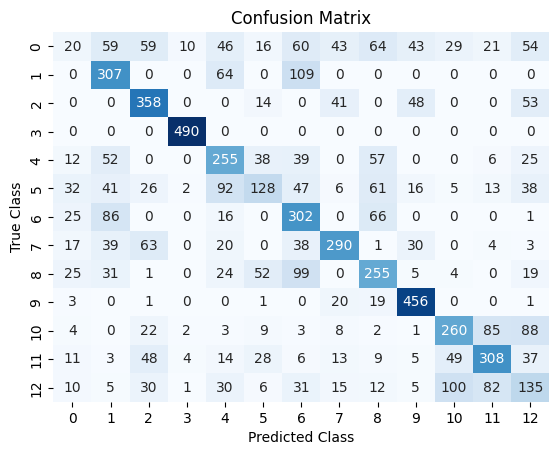

In [ ]:
Model_Evaluation(y_test,LR_y_pred)

In [ ]:
LR = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
LR.fit(x_train,y_train)
LRM_y_pred = LR.predict(x_test)
LR.score(x_test, y_test)

0.5318461538461539

# **Linear regression**

In [ ]:
rm = LinearRegression()
rm.fit(x_train,y_train)

lry_pred = rm.predict(x_test)

mse = mean_squared_error(y_test, lry_pred)

rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 10.709820918683263
Root Mean Squared Error (RMSE): 3.27258627368069
